In [1]:
import pickle
import datetime

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
with open('jf_f1281.pkl','rb') as cellar:
    tests = pickle.load(cellar)
print(tests[-3:])
print('\n\nNumber of posts: ',len(tests))

[{'post': "Along the same lines, I've heard mention of a 4x4 light that comes on when you engage... I know I'm engaging 4 wheel drive, but I've never seen that light. I bought it used couple months back, has around 55k miles on it. Do I just have a short, or did they not put the light on until a certain year?", 'username': 'rodgersmc', 'sig': '89 YJ 4.2L 3" body lift 2" shackle lift 32" tires on 15X10\'s winch soon to be JKB2 mod', 'postid': 54472, 'title': None, 'threadid': 9517, 'thtitle': '4x4 not engaging', 'postdate': datetime.datetime(2002, 3, 24, 14, 51), 'forum': 'f12'}, {'post': 'You should have the light. The inidicator switch would be a little vacuum fitting just aside and below the battery.', 'username': 'Bob K', 'sig': '\'87 Wrangler YJ 4.2 I6 (sorry, sold) JuiceBox ignition 2 1/2" ProComp Lift 31" BFG A/T\'s K&N Filter Custom Rock Guards Turbo Muffler Rear Track Bar in the shed Other Tricks I won\'t tell to just anybody! \'99 Grand Cherokee 4.7 V8 Towing Package K&N FIPK 

In [4]:
# Throw the text of posts from one random datafile into a list.
example = []
for entry in tests:
    example.append(entry['post'])

In [5]:
example[:3]

['I\'m dropping in a chevy 350 w/ a T400 tranny mounted to it in my \'91 YJ. I need information on what others have done and what components to use like what transfer-case, exhaust(where to run it),radiator/fan(s),drive shafts. My \'91 YJ has a 4" trailmaster suspension lift(leafs), 4:56 gears, and 33X12.50 Super Swamper TSL Radials. Please help. I\'m doing it this summer and need all the advice and tips I can get. Thanx Adam Draskovich [email protected]',
 'your gonna need a driver side drop transfer case. check out the atlas transfer case made by advance adapters. if you have the money, thats what id use. http://www.off-road.com/products/sho...atlas-show.htm driveshafts, go with tom woods driveshafts. http://www.4xshaft.com/ they people like advance adapters sells conversion radiators. but they cost an arm and a leg. when i do my swap, im gonna just find something that fits in there, and make my own brackets for it.',
 "a better tranny to drop in there is a 700r4 tranny. Its a newer 

In [6]:
# A challenger appears.
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(example)
doc_word.shape

(101, 1308)

In [7]:
# That was fast.
# From the Topic_Modeling Metis notebook:
# We have to convert `.toarray()` because the vectorizer returns a sparse matrix.
# For a big corpus, we would skip the dataframe and keep the output sparse.
pd.DataFrame(doc_word.toarray(), 
             index=example, columns=vectorizer.get_feature_names()).head(10)

,000,0000000000000000000000,1000,107k,11,13,135,145k,15,1500,...,years,yeh,yep,yj,yjs,yoiu,yolk,yuor,zandm,zook
"I'm dropping in a chevy 350 w/ a T400 tranny mounted to it in my '91 YJ. I need information on what others have done and what components to use like what transfer-case, exhaust(where to run it),radiator/fan(s),drive shafts. My '91 YJ has a 4"" trailmaster suspension lift(leafs), 4:56 gears, and 33X12.50 Super Swamper TSL Radials. Please help. I'm doing it this summer and need all the advice and tips I can get. Thanx Adam Draskovich [email protected]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
"your gonna need a driver side drop transfer case. check out the atlas transfer case made by advance adapters. if you have the money, thats what id use. http://www.off-road.com/products/sho...atlas-show.htm driveshafts, go with tom woods driveshafts. http://www.4xshaft.com/ they people like advance adapters sells conversion radiators. but they cost an arm and a leg. when i do my swap, im gonna just find something that fits in there, and make my own brackets for it.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"a better tranny to drop in there is a 700r4 tranny. Its a newer GM tranny and you can find them with the driver side drop transfer case on them. Its a 4 speed auto and its accually pretty strong. I have heard of people converting to that tranny. its allot better. has a locking torch converter on it that is acccually programable. so you can set it to lock up for the most part. what that means is the auto tranny won't disengadge going down hills as much. It will stay in gear. allot better gear ratio in the tranny for both on and off road performance. I really wanted to put one in my jeep but the convertion for ford to gm tanny was more then i wanted to spend at the time, Still planning on it though. You will want to change out at least your back axle. cuz your going to break it with a v8. i broke mine liek 2 times. Changed over to a ford 8.8 axle off of a ford explorer. the best year of axle is 95 and newer. They come with disc brakes. the 8.8 is allot stronger then the dana 44 axles. You can go to http://mountainoffroad.com and they have some info on the convertion and a kit for it to. as far as radiator goes the stock yj radiator will work fine. but if you want a really good radiator you can go to http://zandm.com and they have a really good radiator there and some other jeep parts that they make. for the exhaust i would just go with shorty headers and then have a muffler shop run the exhaust out the sides under the frame right behind or in frount of where the leaf springs connect to the frame. they fix there pretty well and then run glass packs down the side and out in frount of the back tires. Thats how i have them on my jeep i will get some pics and post them on my jeep page if you want. just email me if you have any other questions.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
oh forgot to mention the 700r4 tranny for GM is shorter then the t400 and stronger,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
okay im getting a new tub put on my jeep right now(cant wait to get it back!). in getting it repainted and have to repaint the hardtop. it is tan right now but want it black. what kind of paint should i use to get that factory hard top look? email me with suggestions at [email protected] thanks jerry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
umm.. someone posted a nice thing about what type of paint to use when i was considering refinishing my hard top (it's seen better days)... there is an actual paint but i wonder if high-gloss herculiner would look good as a hard top coating?,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Use roll-on Rustolem on mine - it turned out okay. I did see a Blazer that was painted in Herculiner or something similiar (not just the top, but the whole outfit) and it looked pretty cool!",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"-Moderator/Please keep this Topic open- Someone posted this lin

In [8]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
# Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD(3)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.10047357, 0.06725881, 0.05230519])

In [9]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2",'c_3'],
             columns = vectorizer.get_feature_names())
topic_word

,000,0000000000000000000000,1000,107k,11,13,135,145k,15,1500,...,years,yeh,yep,yj,yjs,yoiu,yolk,yuor,zandm,zook
component_1,0.024,-0.0,0.019,0.020,0.003,0.019,0.004,0.001,0.004,0.004,...,0.003,0.0,0.001,0.098,0.015,0.001,0.024,0.005,0.016,0.001
component_2,-0.019,0.0,-0.018,0.047,-0.001,-0.018,-0.002,-0.000,-0.002,-0.003,...,-0.001,-0.0,-0.000,-0.015,0.003,-0.000,-0.024,-0.005,-0.025,-0.000
c_3,-0.037,-0.0,-0.038,0.012,0.002,-0.038,0.000,0.001,0.000,-0.005,...,0.002,-0.0,0.000,0.060,-0.020,0.001,-0.034,-0.007,0.047,0.001


In [10]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [12]:
display_topics(lsa, vectorizer.get_feature_names(), 20)


Topic  0
jeep, just, sure, know, lift, make, good, like, really, com, http, stock, 35, axles, want, better, tranny, right, axle, yj

Topic  1
know, home, tcdesign, sprintmail, jpg, http, com, truck, looking, like, dealer, brand, doesn, little, said, used, rear, advice, price, sure

Topic  2
tranny, radiator, http, com, really, ford, want, allot, frount, pretty, drop, exhaust, gear, auto, gm, newer, frame, convertion, going, axle


In [13]:
# That's actually not complete gibberish. Methinks we're actually pulling out the themes
# 1) lift kits, and all that stuff, like tires, tranny - driveshaft - axle mods...
# 2) purchasing advice, and the related fact that dealers don't know much, etc.
# 3) engine swaps, axle swaps, tranny swaps, probably not in that order.
# I bet spaCy could clear out some of this gibberish.
doc_topic_lsa = pd.DataFrame(doc_topic.round(5),
                             index = example,
                             columns = ["component_1","component_2",'c3' ])
doc_topic_lsa.head(20)

,component_1,component_2,c3
"I'm dropping in a chevy 350 w/ a T400 tranny mounted to it in my '91 YJ. I need information on what others have done and what components to use like what transfer-case, exhaust(where to run it),radiator/fan(s),drive shafts. My '91 YJ has a 4"" trailmaster suspension lift(leafs), 4:56 gears, and 33X12.50 Super Swamper TSL Radials. Please help. I'm doing it this summer and need all the advice and tips I can get. Thanx Adam Draskovich [email protected]",1.35267,-0.27186,0.82990
"your gonna need a driver side drop transfer case. check out the atlas transfer case made by advance adapters. if you have the money, thats what id use. http://www.off-road.com/products/sho...atlas-show.htm driveshafts, go with tom woods driveshafts. http://www.4xshaft.com/ they people like advance adapters sells conversion radiators. but they cost an arm and a leg. when i do my swap, im gonna just find something that fits in there, and make my own brackets for it.",1.76811,-0.08701,1.00309
"a better tranny to drop in there is a 700r4 tranny. Its a newer GM tranny and you can find them with the driver side drop transfer case on them. Its a 4 speed auto and its accually pretty strong. I have heard of people converting to that tranny. its allot better. has a locking torch converter on it that is acccually programable. so you can set it to lock up for the most part. what that means is the auto tranny won't disengadge going down hills as much. It will stay in gear. allot better gear ratio in the tranny for both on and off road performance. I really wanted to put one in my jeep but the convertion for ford to gm tanny was more then i wanted to spend at the time, Still planning on it though. You will want to change out at least your back axle. cuz your going to break it with a v8. i broke mine liek 2 times. Changed over to a ford 8.8 axle off of a ford explorer. the best year of axle is 95 and newer. They come with disc brakes. the 8.8 is allot stronger then the dana 44 axles. You can go to http://mountainoffroad.com and they have some info on the convertion and a kit for it to. as far as radiator goes the stock yj radiator will work fine. but if you want a really good radiator you can go to http://zandm.com and they have a really good radiator there and some other jeep parts that they make. for the exhaust i would just go with shorty headers and then have a muffler shop run the exhaust out the sides under the frame right behind or in frount of where the leaf springs connect to the frame. they fix there pretty well and then run glass packs down the side and out in frount of the back tires. Thats how i have them on my jeep i will get some pics and post them on my jeep page if you want. just email me if you have any other questions.",9.37069,-7.13684,10.34185
oh forgot to mention the 700r4 tranny for GM is shorter then the t400 and stronger,0.18122,-0.26767,0.50992
okay im getting a new tub put on my jeep right now(cant wait to get it back!). in getting it repainted and have to repaint the hardtop. it is tan right now but want it black. what kind of paint should i use to get that factory hard top look? email me with suggestions at [email protected] thanks jerry,1.11716,-0.28886,0.19774
umm.. someone posted a nice thing about what type of paint to use when i was considering refinishing my hard top (it's seen better days)... there is an actual paint but i wonder if high-gloss herculiner would look good as a hard top coating?,0.60229,-0.21535,-0.08270
"Use roll-on Rustolem on mine - it turned out okay. I did see a Blazer that was painted in Herculiner or something similiar (not just the top, but the whole outfit) and it looked pretty cool!",0.51302,-0.30597,-0.07618
"-Moderator/Please keep this Topic open- Someone posted this link to sounddomain.com where a guy did this. It's sweeeeet! I'm eventually gonna do this. Subs & Amp under rear seat ""false floor"". quote: ---------------------------------------------------------------------------

In [18]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
#  Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa4 = TruncatedSVD(4)
doc_topic4 = lsa4.fit_transform(doc_word)
lsa4.explained_variance_ratio_

array([0.10047361, 0.06725916, 0.05230417, 0.04607215])

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Text(0, 0.5, 'Explained Variance Ratio')

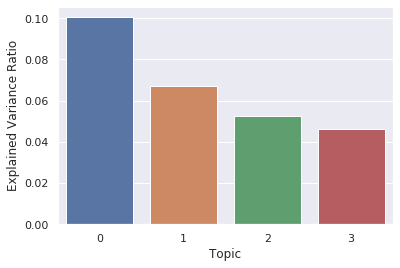

In [25]:
sns.barplot(x=list(range(4)),y=lsa4.explained_variance_ratio_)
plt.xlabel('Topic')
plt.ylabel('Explained Variance Ratio')

In [19]:
topic_word4 = pd.DataFrame(lsa4.components_.round(3),
             index = ['c_'+str(i) for i in range(4)],
             columns = vectorizer.get_feature_names())
topic_word4

,000,0000000000000000000000,1000,107k,11,13,135,145k,15,1500,...,years,yeh,yep,yj,yjs,yoiu,yolk,yuor,zandm,zook
c_0,0.023,0.0,0.019,0.020,0.003,0.019,0.004,0.001,0.004,0.004,...,0.003,0.0,0.001,0.098,0.015,0.001,0.024,0.005,0.016,0.001
c_1,-0.019,-0.0,-0.018,0.047,-0.001,-0.018,-0.001,-0.000,-0.001,-0.003,...,-0.001,-0.0,-0.000,-0.014,0.003,-0.000,-0.024,-0.005,-0.025,-0.000
c_2,-0.038,0.0,-0.038,0.012,0.002,-0.038,0.000,0.001,0.000,-0.005,...,0.002,-0.0,0.000,0.059,-0.020,0.001,-0.034,-0.007,0.047,0.001
c_3,-0.015,-0.0,-0.021,-0.001,0.001,-0.021,0.006,0.001,0.006,0.013,...,0.001,0.0,0.001,-0.016,-0.004,0.001,0.044,0.009,-0.005,0.000


In [20]:
display_topics(lsa4, vectorizer.get_feature_names(), 20)


Topic  0
jeep, just, sure, know, lift, make, good, like, really, com, http, stock, 35, axles, want, better, tranny, right, axle, yj

Topic  1
know, home, jpg, sprintmail, tcdesign, http, com, truck, looking, like, dealer, brand, doesn, little, said, used, rear, advice, price, sure

Topic  2
tranny, radiator, http, com, really, ford, want, allot, frount, pretty, drop, exhaust, gear, auto, gm, newer, frame, convertion, going, axle

Topic  3
vacuum, transmission, automatic, fork, line, fluid, port, pressure, right, slide, forks, tester, forth, problem, lines, plug, vaccume, going, lock, way


Topics 0, 1, 2 look like the same topics as before. Good that it's stable?

3. Interesting. This looks like a mashup of issues about the vacuum driven 4x4 engagement system with stuff about the transmission. Kind of would have expected "transfer" or "case" to show up.

In [21]:
doc_topic_lsa4 = pd.DataFrame(doc_topic4.round(4),
                             index = example,
                             columns = ['c_'+str(i) for i in range(4)])
doc_topic_lsa4.head(10)

,c_0,c_1,c_2,c_3
"I'm dropping in a chevy 350 w/ a T400 tranny mounted to it in my '91 YJ. I need information on what others have done and what components to use like what transfer-case, exhaust(where to run it),radiator/fan(s),drive shafts. My '91 YJ has a 4"" trailmaster suspension lift(leafs), 4:56 gears, and 33X12.50 Super Swamper TSL Radials. Please help. I'm doing it this summer and need all the advice and tips I can get. Thanx Adam Draskovich [email protected]",1.3527,-0.2717,0.8314,-0.1614
"your gonna need a driver side drop transfer case. check out the atlas transfer case made by advance adapters. if you have the money, thats what id use. http://www.off-road.com/products/sho...atlas-show.htm driveshafts, go with tom woods driveshafts. http://www.4xshaft.com/ they people like advance adapters sells conversion radiators. but they cost an arm and a leg. when i do my swap, im gonna just find something that fits in there, and make my own brackets for it.",1.7681,-0.0902,1.0170,0.1176
"a better tranny to drop in there is a 700r4 tranny. Its a newer GM tranny and you can find them with the driver side drop transfer case on them. Its a 4 speed auto and its accually pretty strong. I have heard of people converting to that tranny. its allot better. has a locking torch converter on it that is acccually programable. so you can set it to lock up for the most part. what that means is the auto tranny won't disengadge going down hills as much. It will stay in gear. allot better gear ratio in the tranny for both on and off road performance. I really wanted to put one in my jeep but the convertion for ford to gm tanny was more then i wanted to spend at the time, Still planning on it though. You will want to change out at least your back axle. cuz your going to break it with a v8. i broke mine liek 2 times. Changed over to a ford 8.8 axle off of a ford explorer. the best year of axle is 95 and newer. They come with disc brakes. the 8.8 is allot stronger then the dana 44 axles. You can go to http://mountainoffroad.com and they have some info on the convertion and a kit for it to. as far as radiator goes the stock yj radiator will work fine. but if you want a really good radiator you can go to http://zandm.com and they have a really good radiator there and some other jeep parts that they make. for the exhaust i would just go with shorty headers and then have a muffler shop run the exhaust out the sides under the frame right behind or in frount of where the leaf springs connect to the frame. they fix there pretty well and then run glass packs down the side and out in frount of the back tires. Thats how i have them on my jeep i will get some pics and post them on my jeep page if you want. just email me if you have any other questions.",9.3707,-7.1367,10.3377,-0.9958
oh forgot to mention the 700r4 tranny for GM is shorter then the t400 and stronger,0.1812,-0.2677,0.5095,-0.0420
okay im getting a new tub put on my jeep right now(cant wait to get it back!). in getting it repainted and have to repaint the hardtop. it is tan right now but want it black. what kind of paint should i use to get that factory hard top look? email me with suggestions at [email protected] thanks jerry,1.1172,-0.2889,0.1998,0.2119
umm.. someone posted a nice thing about what type of paint to use when i was considering refinishing my hard top (it's seen better days)... there is an actual paint but i wonder if high-gloss herculiner would look good as a hard top coating?,0.6023,-0.2153,-0.0831,0.1701
"Use roll-on Rustolem on mine - it turned out okay. I did see a Blazer that was painted in Herculiner or something similiar (not just the top, but the whole outfit) and it looked pretty cool!",0.5130,-0.3063,-0.0758,0.1003
"-Moderator/Please keep this Topic open- Someone posted this link to sounddomain.com where a guy did this. It's sweeeeet! I'm eventually gonna do this. Subs & Amp under rear seat ""false floor"". quote: -------------------------------------------------------

Text(0, 0.5, 'Score')

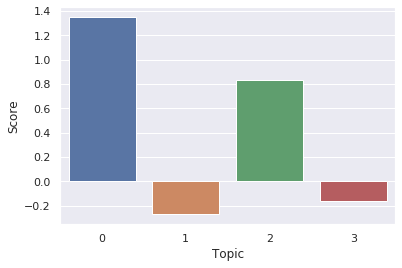

In [26]:
sns.barplot(x=list(range(4)),y=doc_topic_lsa4.iloc[0])
plt.xlabel('Topic')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

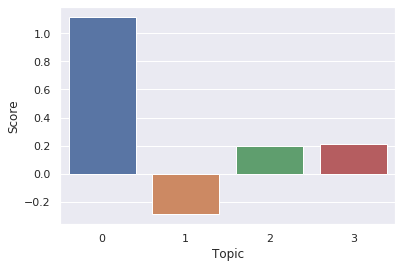

In [27]:
sns.barplot(x=list(range(4)),y=doc_topic_lsa4.iloc[4])
plt.xlabel('Topic')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

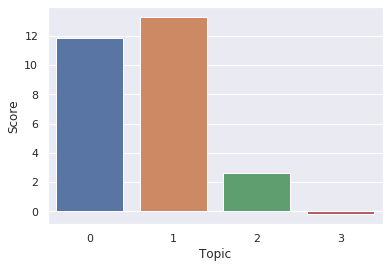

In [28]:
sns.barplot(x=list(range(4)),y=doc_topic_lsa4.iloc[9])
plt.xlabel('Topic')
plt.ylabel('Score')